# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import scipy.integrate as integrate
import scipy

In [9]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [10]:
athletes = pd.read_csv("athletes.csv")

In [11]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [12]:
sample = get_sample(athletes, "height", n = 3000)

sample.head

<bound method NDFrame.head of 1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
         ... 
1483     1.75
2586     1.78
2949     1.60
10268    1.75
5892     1.76
Name: height, Length: 3000, dtype: float64>

In [17]:
def q1():
    sample = get_sample(athletes, "height", n = 3000)
    teste, norm = sct.shapiro(sample)
    alpha = 0.05
    
    return (True if norm > alpha else False)
    
q1()


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

/Users/amandagentil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


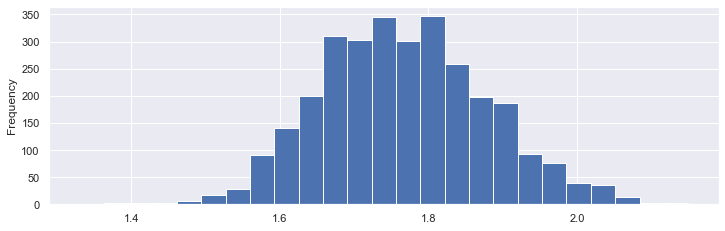

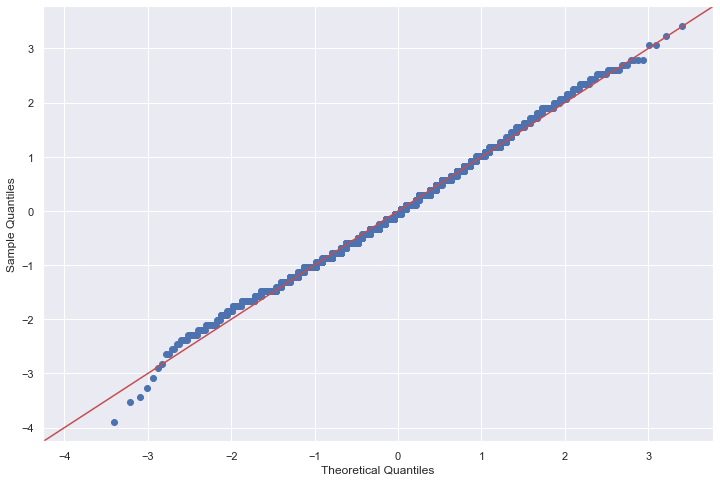

In [19]:
import statsmodels.api as sm

sample = get_sample(athletes, "height", n = 3000)

plt.subplot(2, 1, 1)
sample.plot(kind='hist', bins=25)

plt.subplot(2, 1, 1)
sm.qqplot(sample, fit=True, line="45");
plt.show()

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [21]:
def q2():
    sample = get_sample(athletes, "height", n = 3000)
    teste, norm = sct.jarque_bera(sample)
    alpha = 0.05
    
    return (True if norm > alpha else False)
    
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [23]:
def q3():
    sample = get_sample(athletes, "weight", n = 3000)
    teste, norm = sct.normaltest(sample)
    alpha = 0.05
    
    return (True if norm > alpha else False)
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

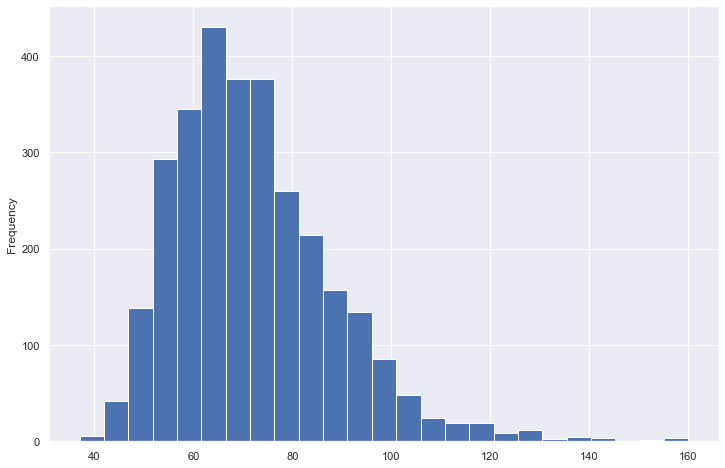

In [24]:
sample = get_sample(athletes, "weight", n = 3000)
sample.plot(kind='hist', bins=25)

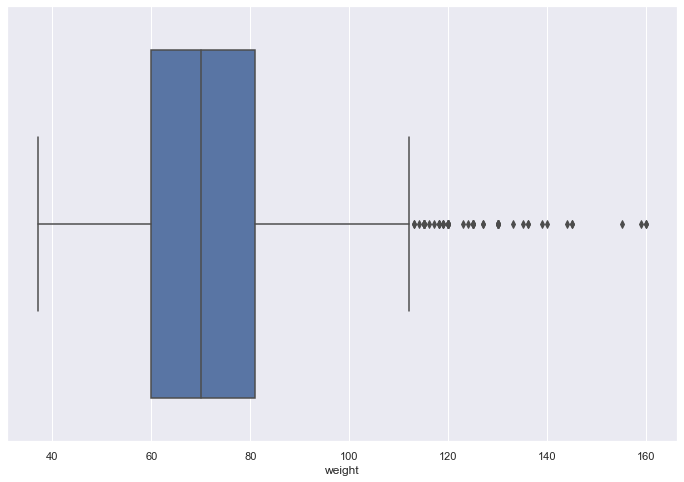

In [25]:
sns.boxplot(x = sample)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [27]:
sample = get_sample(athletes,'weight', n=3000)
sample_log = np.log(sample)
def q4():
  
    teste, norm = sct.normaltest(sample_log)

    alpha = 0.05
    
    return (True if norm > alpha else False)

q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

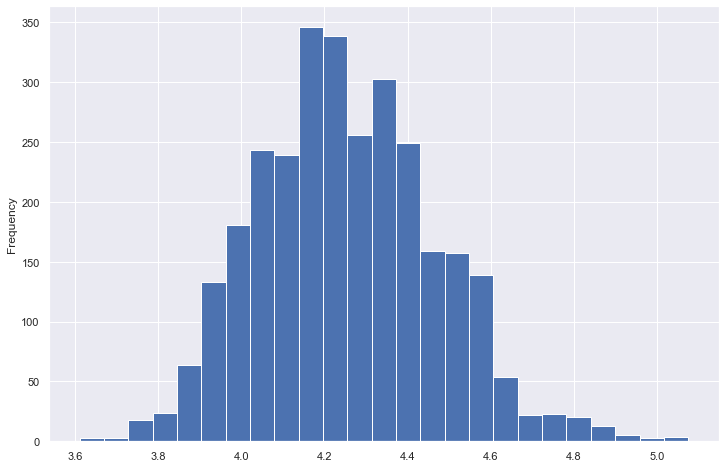

In [28]:
sample_log.plot(kind='hist', bins=25)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [29]:
df_bra = athletes[athletes['nationality'] == 'BRA'].dropna(subset=['height'])
df_usa = athletes[athletes['nationality'] == 'USA'].dropna(subset=['height'])
df_can = athletes[athletes['nationality'] == 'CAN'].dropna(subset=['height'])

In [31]:
def q5():

    teste, norm = sct.ttest_ind(df_bra['height'], df_usa['height'], equal_var=False )
    
    alpha = 0.05
  
    return (True if norm > alpha else False)
   
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [32]:
def q6():
    teste, norm = sct.ttest_ind(df_bra['height'], df_can['height'], equal_var=False )
    
    alpha = 0.05
  
    return (True if norm > alpha else False)
   
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [35]:
def q7():
    teste, norm = sct.ttest_ind(df_usa['height'], df_can['height'], equal_var=False )
    
    alpha = 0.05
  
    return float(round(norm,8))
   
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?